# FRB Pipeline Simulation

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import *

In [2]:

def axis_labels(x, y, z):
    xlab = xlabel(x)
    ylab = ylabel(y)
    titles = title(z)
    legends = legend
    return xlab, ylab, titles, legends

The following steps will simulate the anologue process that occurs before the data is downsampled. Any pulsar will work for this, however, the pulsar being simulated will be made using the paramters below.

In [3]:
#Define the parameters for the noise that will be mixed with the pulse
Cf = 1400e6 #This is the centre frequency in MHz, and where we will be viewing from
Bw = 10e6 #This is the bandwidth that we are observing with our telescope
sample_rate = 12e9 # Frequency running simulation at.
period = .005 #seconds 

With a period of 5ms, we will use a time frame with this length to simulate one pulse. The bins in this simulation is determined by the sampling rate, which can be changed above. The current value is at such that 12GB ram computerss will just be able to simulate. The higher value the sampling rate is given, the more accurate the simulation becomes, but at the expense of what the computer is able to process.

In [4]:
#Define the timescale in which we will be observing
t = np.linspace(-.0025,.0025, period*sample_rate) #Decreasing the period for this will decrease the samples obtained

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


To create the pulsar, first noise is simulated using a normal distribution of values. This distribution is made such that the standard deviation is 1, and is centred around 0. 

In [5]:
#Create the Gaussian noise profile for the pulsar
length = len(t)     #This defines the number of timesamples we have, ie the number of samples collected
mu = 0              #This indicates an offset of 0, meaning the signal is perfetly centred about 0
sigma = 1           #This idicates an std of 1
gnoise = np.random.normal(mu, sigma, length) #This is the GAussian noise for the signal
pw = .0004 #seconds
print(length)

60000000


This noise is then multiplied to a gaussian that has a standard deviation equal to that of the desired pulse width.The gaussian was made using the equation \begin{equation} e^{\frac{-1}{2}(\frac{t}{pw})^2} \end{equation}.

In [6]:
gnoise = np.exp(.5*-(t/pw)**2)*gnoise #Define the pulse of the signal. The gaussian profile takes an input of the 

Observe now that the resulting signal looks like a Gausian distribution

<IPython.core.display.Javascript object>


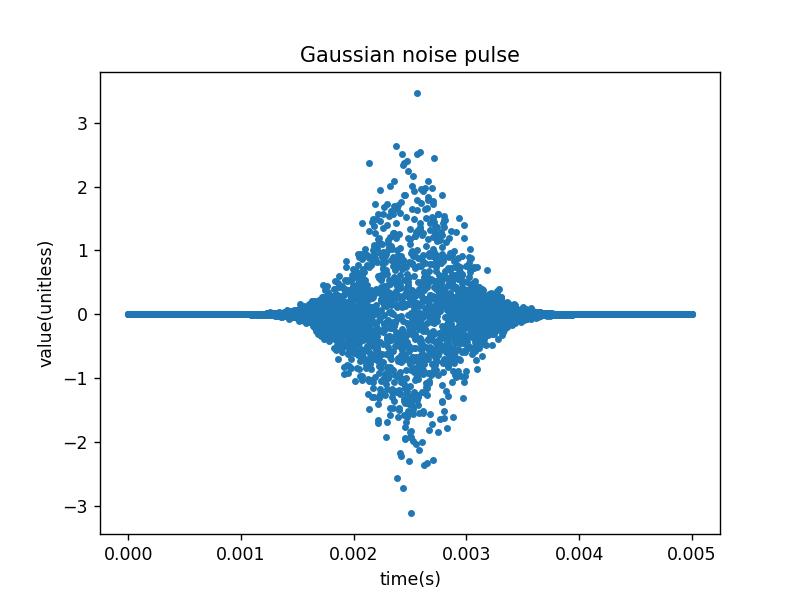

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


(Text(0.5,0,'time(s)'),
 Text(0,0.5,'value(unitless)'),
 Text(0.5,1,'Gaussian noise pulse'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [7]:
#Now plot the signal, and observe the pulse shape. To see the pulse without destroying the computer, 
#plot every 10000th point
figure()
plot(np.linspace(0,.005, period*sample_rate)[0::10000],gnoise[0::10000], ls='none', marker='.')
axis_labels('time(s)', 'value(unitless)', 'Gaussian noise pulse')

Now, to create the pulsar, we take the Fourier transform of the Gaussian, so that we may eliminate all but one frequency of the Gaussian

In [8]:
#Now take the fourier transform of the pulse to get it in frequency space
fourier_pulse = np.fft.fft(gnoise)

The x-axis for the resulting graph is caluclated here. This tells what the frequency step for the broadband noise of the Gaussian is. This is done by taking the fftfreq of the length of the Gaussian, and having it step by the sample rate in units of MHz.

In [9]:
#The fourier transformed data should look like broadband noise, so define the axes properly before plotting
broad_freq = np.fft.fftfreq(length, 1/(sample_rate/1e6)) #This gives the signal in MHz, (specifically from the 1e6)

The plot of the Fourier transform of the Gaussian wave packet is a broadband noise plot as expected.

<IPython.core.display.Javascript object>


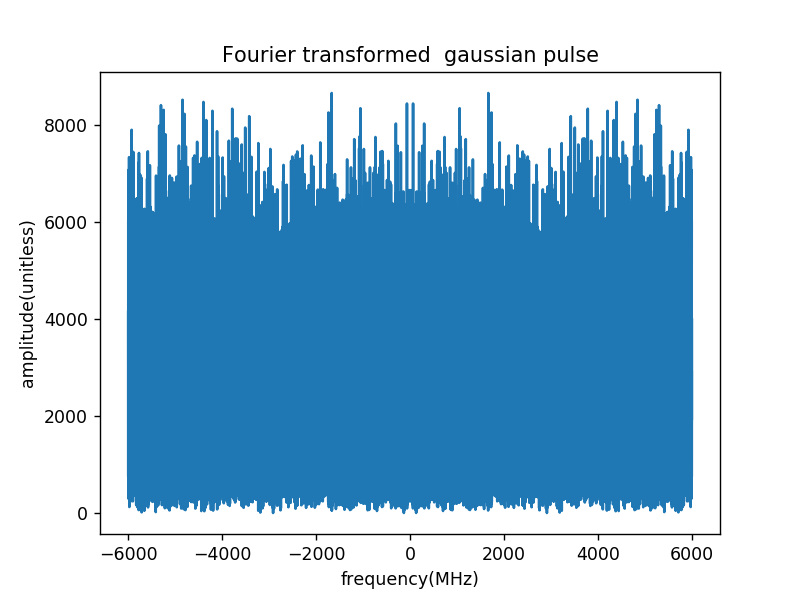

(Text(0.5,0,'frequency(MHz)'),
 Text(0,0.5,'amplitude(unitless)'),
 Text(0.5,1,'Fourier transformed  gaussian pulse'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [10]:
figure()
plot(broad_freq[::1000], np.abs(fourier_pulse[::1000])) #Square the abs value to get better view
axis_labels("frequency(MHz)", 'amplitude(unitless)', 'Fourier transformed  gaussian pulse')

Now, all frequencies but one are reduced to zero through filtering. To filter, the highpass frequency, or the highest frequency that we wish to observe with our bandwidth, is used to find the point in our data that is set as an index.....

In [11]:
#Now we modify the noise, so that there are only +- of the same frequency in it of it. This is the pulsar!
#Everything outside the two reference frequencies is turned to zero
highpass_freq = (Cf-Bw/2.0) #This sets the centre frequency to 0, with a bandwidth deifned above
highpass_index1 = int(highpass_freq/(sample_rate/2)*length/2) #This finds the point in the array with the value
highpass_index2 = length - highpass_index1 #Same but for different point
fourier_pulse[:highpass_index1] = 0 #This is turning everything outside the two points to zero
fourier_pulse[highpass_index2:] = 0 #Same as above

#Everything outside of the two frequencies is turned to 0
nyquest_index = int(length/2) #This value is determined by the nyquist sampling theorem(helps figure out where the chinkc are)
#The following is the same as above, but now for outside the frequency values
lowpass_freq = Cf+Bw/2.0 
lowpass_index1 = int(lowpass_freq/(sample_rate/2)*length/2)
lowpass_index2 = length - lowpass_index1
fourier_pulse[lowpass_index1:nyquest_index] = 0
fourier_pulse[nyquest_index:lowpass_index2] = 0

<IPython.core.display.Javascript object>


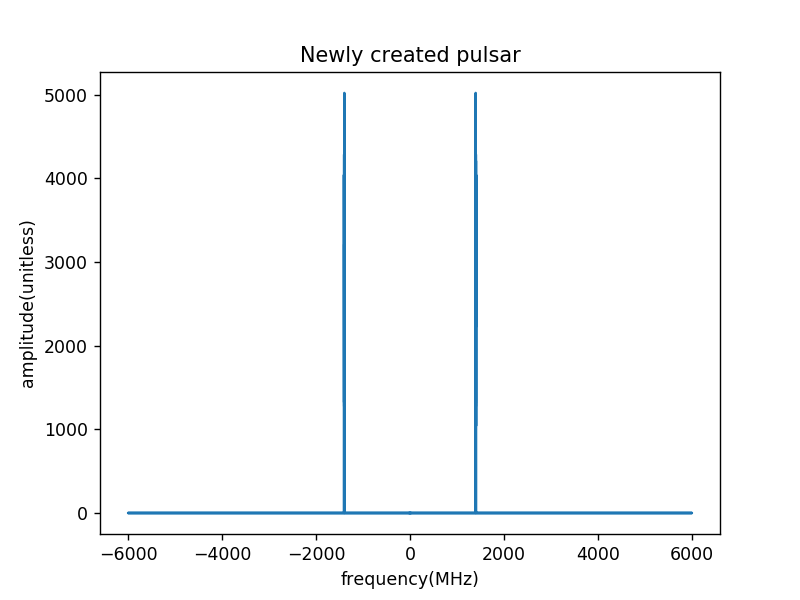

(Text(0.5,0,'frequency(MHz)'),
 Text(0,0.5,'amplitude(unitless)'),
 Text(0.5,1,'Newly created pulsar'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [12]:
figure()
plot(broad_freq[::1000], np.abs(fourier_pulse[::1000]))
axis_labels("frequency(MHz)", 'amplitude(unitless)', 'Newly created pulsar')

Now that all but the absolute value of one frequency has been given a value of zero, we have created our pulsar. The pulsar is now changed back into the time domain using an inverse fourier transform, and still looks like a Gaussian wave packet as desired. 

In [13]:
#Now turn the pulsar back into time space from frequency space
blimited_pulse = np.fft.ifft(fourier_pulse)

<IPython.core.display.Javascript object>


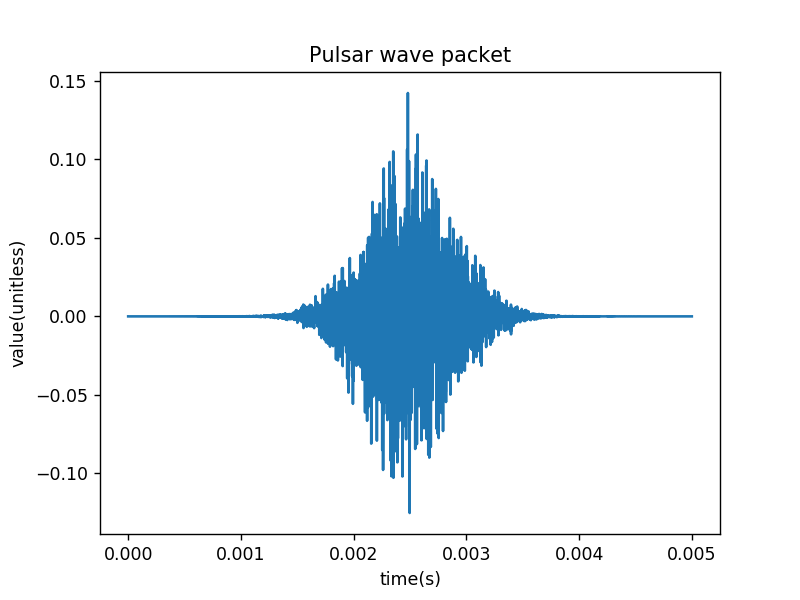

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andy/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(Text(0.5,0,'time(s)'),
 Text(0,0.5,'value(unitless)'),
 Text(0.5,1,'Pulsar wave packet'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [14]:
#If this pulse is plotted again, it sill looks like the same as before
figure()
plot(np.linspace(0,.005, period*sample_rate)[0::10000], blimited_pulse[::10000])
axis_labels('time(s)', 'value(unitless)', 'Pulsar wave packet')

To simulate what the computer recieves after the telescope detects the signal, we need to create a mixing signal which will be used to downsample the data. This mixing signal is created using the complex Euler equation:
$e^{-2\pi j *\frac{Cf}{samp}*len}$, where Cf is defined as above, samp is the sample rate, and len is the array with size length, with step size of 1. It is also assumed that the pulse currently is centred around the same point, x=0, which eliminates the \omega that is in the original equation.

In [15]:
#Now need to create the mixing signal:
mixing_signal = np.exp(-2.00j*np.pi* Cf/sample_rate *np.arange(length)) #With this we create the mixing signal using the euler equation for the signal

#We assume the pulse is always centred around the same point, so the only part of the signal equaiton needed is 
#omega*t. 

The pulse is then multiplied to the mixing signal. The fourier transform of this new signal is then taken, and a lowpass filter is applied to it. This is to create an IQ data set for the bandwidth. This filter was made using the nyquist sampling theorem to prevent oversampling with the bandwidth specified. The inverse fourier transform of this signal is then taken, and it is downsampled by taking only samples that have spcings of the $\frac{sample\_ rate}{bandwidth}$

In [16]:

#Mix and sample down the pusar signal so that we can have an I Q data set for the bandwidth
mixed_down_s = blimited_pulse*mixing_signal
N_cutoff = int(Bw/2/sample_rate*length) #This is from the lowpass fileter definition
fmixed = np.fft.fft(mixed_down_s) #This creates the fourier transform of the mixed signal
fmixed[N_cutoff:-N_cutoff] = 0.0 # this makes it so that the imaginary magnitudes are comparable to the reals. This is
                                    #also our filter
filtered_mixed_down_s = np.fft.ifft(fmixed) #This brings the fourier space pulse back into a packet
#Downsample so that is...
downsampled_filtered_mixed_down_s = filtered_mixed_down_s[::int(sample_rate/(Bw))]
#complex sampled at 10MHz instead of 12GHz
#This gives us 50000 indicies instead of 60000000

The pulse is now downsampled, and realistically, this is where the simulation can begin. The previous lines of code were used to demponstrate how the anologue to digital converter chain works. Now, the new downsampled signal will be plotted below. Again, this pulsar signal still looks like a wave packet. 

<IPython.core.display.Javascript object>


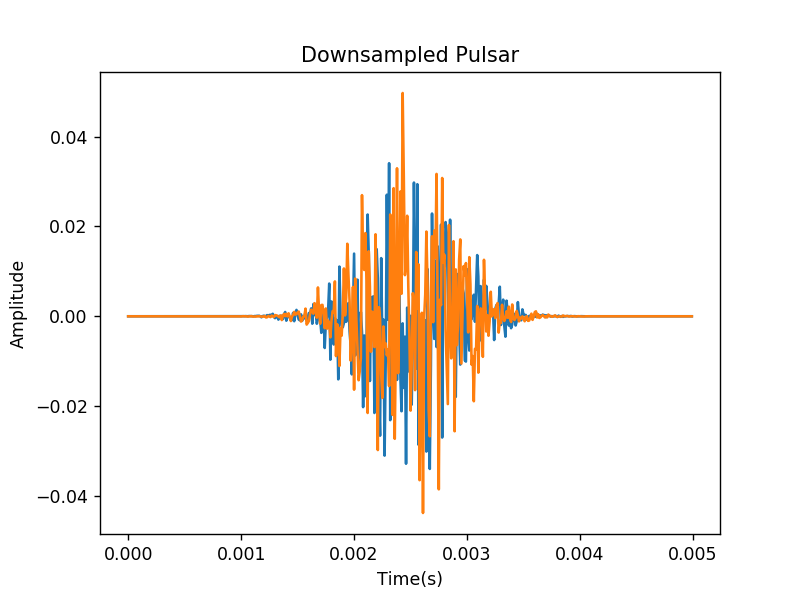

(Text(0.5,0,'Time(s)'),
 Text(0,0.5,'Amplitude'),
 Text(0.5,1,'Downsampled Pulsar'),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [17]:
#The simulation can be run from this point

# Use gaussian noise, filter with same time width.
#Now plot the signal, and observe that the pulse shape is the same, but now using smaller increments between samples
figure()
plot(np.linspace(0,.005, len(downsampled_filtered_mixed_down_s))[0::100], downsampled_filtered_mixed_down_s[::100].real)
plot(np.linspace(0,.005, len(downsampled_filtered_mixed_down_s))[0::100], downsampled_filtered_mixed_down_s[::100].imag)
axis_labels('Time(s)', 'Amplitude', 'Downsampled Pulsar')

Right now, there is a single pulse, so this is more of an FRB than a pulsar. In order to make this a repeating pulse, use numpy to repeat it. Below, this was done 30 times to get a nice sample of pulses.

In [18]:
#We repeat the pulse to get about 0.15 seconds of data
downsampled_filtered_mixed_down_s_repeated = np.tile(downsampled_filtered_mixed_down_s, 30)

Now finally, the pulsar is dispersed, which is what the telescope would show the pulsar as. The number of time samples of the new repeated pulse is found, and this is used to find the frequency steps for the pulse. A Dispersion measure (DM) is arbitrarilly chosen. Then the fourier transform of the delay time, given by the equation
\begin{equation}4.15e6 *DM*(\frac{1}{\nu_1^2}-\frac{1}{\nu_2^2}) \end{equation}. This equation assumes a frequency given in MHz, however here, it is given in Hz. Therefore, the equation must be divided by 1e9, which is how the constant in the code below is obtained. The fourier transform of this is then taken and convolved to the fourier transform of the pulse to disperse it.

In [19]:
#This is where the pulsar is dispersed
#We do a convolution in fourier space, which must be long wrt the dispersion delay time
dis_length = len(downsampled_filtered_mixed_down_s_repeated) #This gives us the number of time samples of the 
                                                             #downsampled repeated pulse
freq_step = np.linspace(-Bw/2, Bw/2, dis_length) #This is the new frequency step for the pulse
DM = 600 #This is the dispersion measure and it is completely arbitrary
#Create the signal to be convolved with the data. This signal is the pulsar
H = np.exp(2j*np.pi*4.15e15*DM*freq_step**2/((Cf+freq_step)*Cf**2)) #Where the part that looks similar to the delay 
#time is the 'time' portion of the equation

As a precaution, the delay time is checked to ensure that it is less than the dispersion time of the data......

In [20]:
#Check how long the dispersion is
delay_time = 4.15e15 * (1/(Cf-Bw/2)**2 - 1/(Cf+Bw/2)**2) * DM
#The delay time must be significantly less than the dispersion of the data
print(delay_time) #This time must be less thah H

0.018149151032241222


In [21]:
dispersed_downsampled_filtered_mixed_sig = np.fft.ifft(np.fft.fft(downsampled_filtered_mixed_down_s_repeated)*np.fft.fftshift(H))
#The pulse signal and the dispersion of the pulse were convolved to give a dispersed pulse

The pulse has successfully been dedispersed

<IPython.core.display.Javascript object>


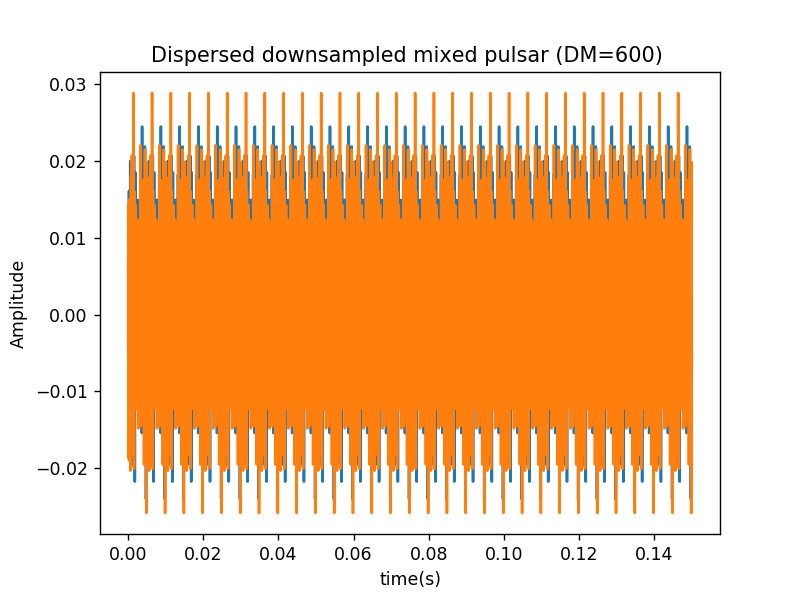

(Text(0.5,0,'time(s)'),
 Text(0,0.5,'Amplitude'),
 Text(0.5,1,'Dispersed downsampled mixed pulsar (DM=600) '),
 <function matplotlib.pyplot.legend(*args, **kwargs)>)

In [22]:
#Plotting the convolved signal...
figure()
plot(np.linspace(0,.15, dis_length)[::100], dispersed_downsampled_filtered_mixed_sig[::100].real)
plot(np.linspace(0,.15, dis_length)[::100], dispersed_downsampled_filtered_mixed_sig[::100].imag)
axis_labels('time(s)', 'Amplitude', 'Dispersed downsampled mixed pulsar (DM=600) ')

Now this is how this is how the pulse looks when it enters into the computer. The task is to now dedisperse it. We want an integration time that is dependent on the bandwidth. Therefore the inverse of the bandwidth is taken as the time that comes from the bandwidth. 

In [23]:
#We want a 10Msps, since this is the bandwidth
times = 1/10e6


The number of desired frequency channels is set. This is an arbitrary choice. The integration size determins the signal to noise ratio of the data,and so an integration number of .2ms is chosen, since it is much smaller than the pulse width. Therefore, the resulting number of integrations done on the pulsar is 5. Finally, the number of timesteps for the pulse is chosen. This will dictate how many pulses will be able to be seen.

With these parameters, the FFT of the data per timestep is done, and arranged into an array as frequency by time.
In order to get this into a more conventional array, its transpose is taken, so that it is arranged frequency by time.

In [24]:

#To check that this number of frequencies, integrations, and sampling rate work
#integrate 5 samples
step = 400 #This comes from the number of frequency channels desired. This is an educated, but arbitrary choice
integration_size = int(2e-4/(times)/step) #This comes from the 0.2ms integration that we desire. It is .2 bc .1 was too small
n_time = int(len(dispersed_downsampled_filtered_mixed_sig)/step/integration_size) #This finds the number of
                                                            #timesteps
rec_spect = np.zeros(((n_time), step), dtype=complex) #This the is the recieved 3d plot of frequency vs time
for i in range(n_time): #This is the number of 'rows'
    for j in range(integration_size):
        spect = np.fft.fft(dispersed_downsampled_filtered_mixed_sig[(integration_size*i+j)*step : (integration_size*i+j+1)*step])
        #This is an easy way to get the row size that we desire
        rec_spect[i] += spect*spect.conjugate() #The first timestep of the frequencies needs to be multiplied by its conjugate
        #The spetra are added together because we are 'folding' the amplitudes together. If we don't, then there appears 
        #a jump in the data.

        
        
    

Then the x axis of the plot is created, where first the number of frequency channels is found, then the centre frequency of that array is set at 1400MHz

In [25]:
n_frequencies = np.fft.fftfreq(n_time, 1/(10e6/1e6)) #This is the number of frequency channles. This will lable the 
                                                     #the x axis
pulse_freqs = np.fft.fftshift(n_frequencies)+Cf/1e6 #This will place the centre frequency of the plot at 1400MHz
dispersed = np.flip(np.transpose(np.fft.fftshift(abs(rec_spect))), 0)#The array of the data must be flipped to match 
                                    #the units in the plot,and it must be transposed so that time is on the x axis.

The 3d graph of the dispersed pulsar is then plotted

<IPython.core.display.Javascript object>


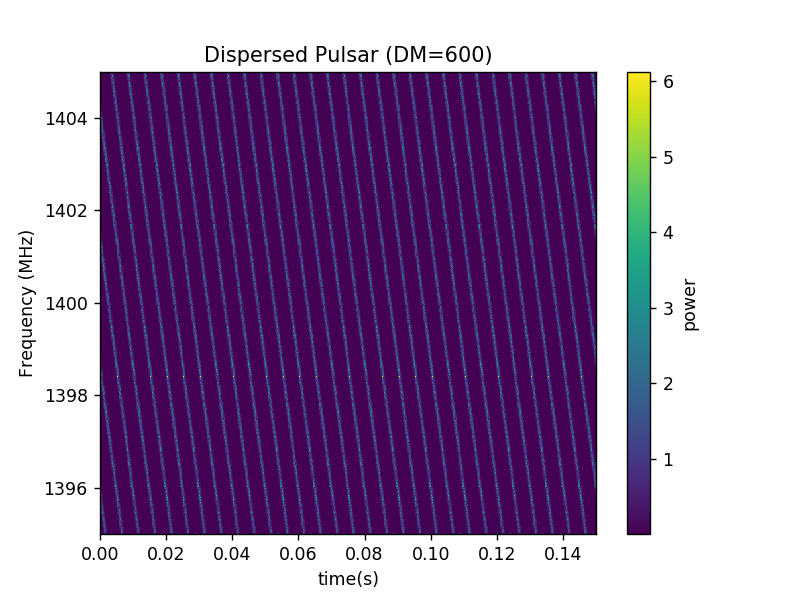

In [26]:
#This is the graph of the pulsar, where we can see that it is dispersed
figure()
imshow(dispersed, extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amin(pulse_freqs),\
                            np.amax(pulse_freqs)],\
                              aspect='auto')
axis_labels('time(s)','Frequency (MHz)',  'Dispersed Pulsar (DM=600)')
colorbar(label = 'power')
savefig("/home/andy/Pictures/Dispersed_pulsar_DM=600.png")
#Congrats!, we now have a dispersed pulsar


Now the pulsar is attempted to be dedispersed. Assume that the DM, nor the period of the pulsar is known. An array of possible DM's is created, along with a timestep array of when the pulses arrive. Then using the time delay equation used to disperse the pulsar, the time changes for every DM are calculated

In [27]:
DMs = np.linspace(400,800,400) #Assume that we do not know the DM for the pulsar. We must then Guess a range of DM

t1s = (np.linspace(0,.15, dis_length/step/integration_size))#Define time step that the pulse arrives at
time_change = np.zeros((len(DMs), len(t1s))) #This is the time after the first frequency which the second frequncy arrives
for i in range(len(DMs)):
    change = t1s+4.15e6*DMs[i]*( 1/(np.min(pulse_freqs))**2 - 1/( pulse_freqs )**2) #This is the definition for the time that the second freq arrives
    time_change[i,:] = change[:]


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Using the time delays, the pulsar is now dedispersed for every guessed DM. This is done by using numpy.roll. The threshold for the roll is set as $\frac{timesteps*integration\_size}{frequency\_channels}/( \frac{timesteps*integration\_size}{frequency\_channels*DMs}+1)*( \frac{integration\_size}{frequency\_channels}+1)$

In [28]:
dedisperse = np.zeros((len(DMs),dispersed.shape[0], dispersed.shape[1]))  #The dedispersed pulse will have the same shape as the dispersed one
for i in range(len(DMs)):
    dedis = dispersed*0
    for j in range(step):
        de = np.roll(dispersed[j,:],-int(time_change[i,j]*(n_time/step*integration_size/(n_time/step*integration_size/DMs[i]+1)*(integration_size/DMs[i]/2+1)))) #np.roll shifts 
                #the data over after the last position and reintroduces it to the first position
        dedis[j,:] = de[:]
    dedisperse[i,:,:] = dedis

One value for the pulse is then plotted below

<IPython.core.display.Javascript object>


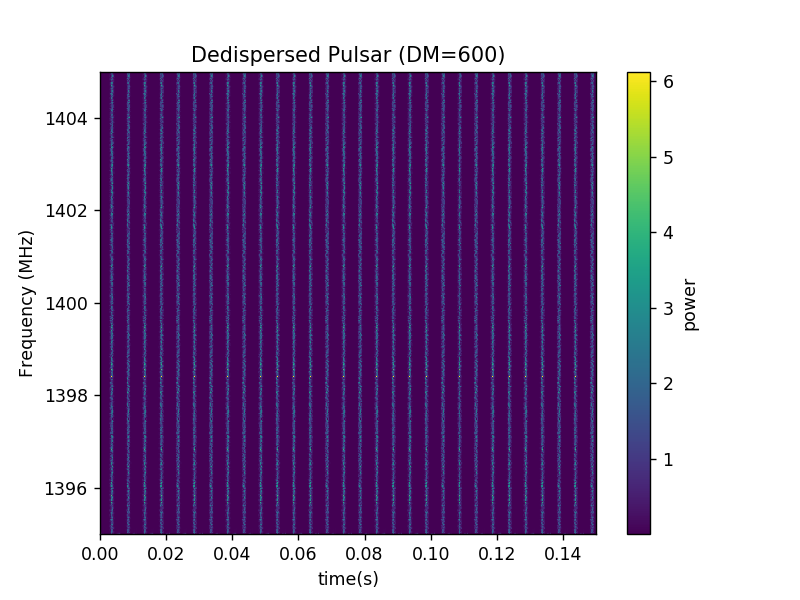

In [36]:
figure()
imshow(dedisperse[200], extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amin(pulse_freqs),\
                            np.amax(pulse_freqs)],\
                              aspect='auto')
axis_labels('time(s)','Frequency (MHz)',  'Dedispersed Pulsar (DM=600)')
colorbar(label = 'power') #This shows the effec the dedispersion had on the 200th DM
savefig("/home/andy/Pictures/Dedispersed_pulsar_DM=600.png")

To create a DM vs time plot, the array is summed along the frequency axis for every DM

In [30]:
DM_measure = np.sum(dedisperse, axis = 1)

This new array is then plotted below. Note that the result is raised to a large power. This is because the SNR needs to be high to ensure an accurate reading for the possible DMs. 

<IPython.core.display.Javascript object>


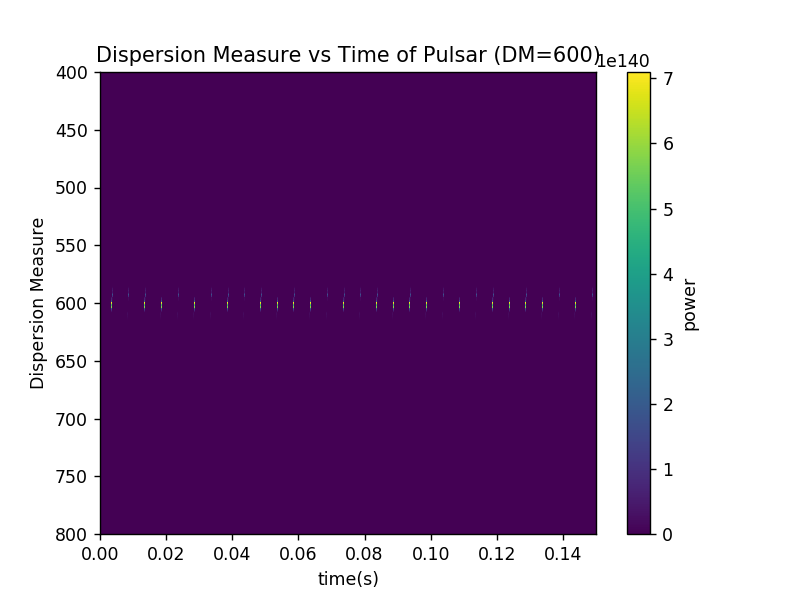

In [31]:
figure()
imshow((abs(DM_measure)**50), extent=[np.amin(np.linspace(0,.15, dis_length)),\
                            np.amax(np.linspace(0,.15, dis_length)),\
                            np.amax(DMs),np.amin(DMs)
                            ],\
                              aspect='auto')
axis_labels('time(s)','Dispersion Measure',  'Dispersion Measure vs Time of Pulsar (DM=600)')
colorbar(label = 'power') #This is the plot of DM vs time
savefig("/home/andy/Pictures/dispersion_measure_vs_time_DM=600.png")

In [32]:
(n_time/step*integration_size/20+1)

1.46875

In [33]:
print(integration_size)
print(step)
print(n_time)
print(20,600)

5
400
750
20 600


In [34]:
n_time/step*integration_size/(n_time/step*integration_size/20+1)*(5/20+1)

7.9787234042553195

In [35]:
(5/20/2+1)

1.125